In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 105s 1us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

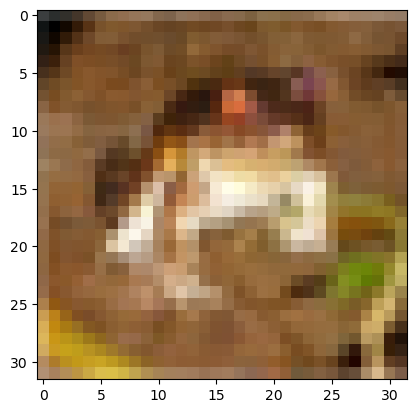

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train = x_train/255

In [7]:
x_test = x_test/255

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters =32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)              

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5305 - accuracy: 0.4474 - val_loss: 1.2614 - val_accuracy: 0.5475
Epoch 2/15
1563/1563 [==============================] - 60s 39ms/step - loss: 1.2048 - accuracy: 0.5727 - val_loss: 1.2211 - val_accuracy: 0.5714
Epoch 3/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0591 - accuracy: 0.6248 - val_loss: 1.0553 - val_accuracy: 0.6326
Epoch 4/15
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9568 - accuracy: 0.6648 - val_loss: 0.9924 - val_accuracy: 0.6557
Epoch 5/15
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8643 - accuracy: 0.6983 - val_loss: 0.9945 - val_accuracy: 0.6611
Epoch 6/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7914 - accuracy: 0.7242 - val_loss: 0.9964 - val_accuracy: 0.6661


In [22]:
metrics = pd.DataFrame(model.history.history)

In [23]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.530502,0.44742,1.261418,0.5475
1,1.204776,0.57274,1.221084,0.5714
2,1.059115,0.62482,1.055256,0.6326
3,0.956811,0.66480,0.992392,0.6557
4,0.864313,0.69826,0.994529,0.6611
5,0.791403,0.72420,0.996382,0.6661


In [24]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

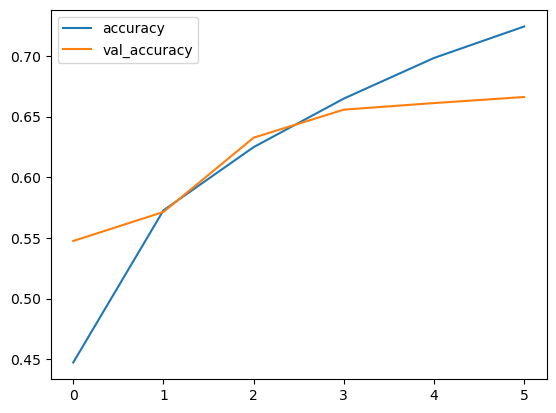

In [25]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

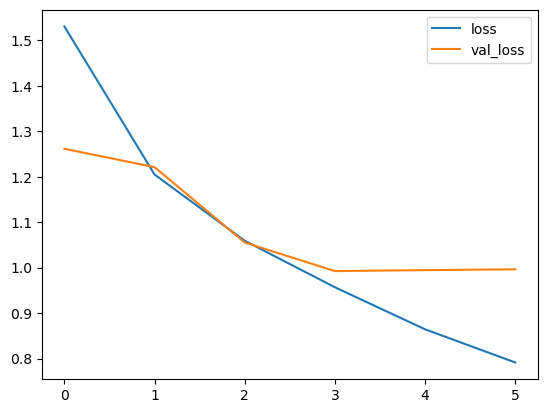

In [26]:
metrics[['loss','val_loss']].plot()

In [27]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9963817596435547, 0.666100025177002]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 10ms/step


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1000
           1       0.82      0.75      0.78      1000
           2       0.63      0.49      0.55      1000
           3       0.46      0.50      0.48      1000
           4       0.70      0.52      0.59      1000
           5       0.49      0.68      0.57      1000
           6       0.77      0.73      0.75      1000
           7       0.73      0.72      0.73      1000
           8       0.73      0.81      0.77      1000
           9       0.69      0.78      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



<AxesSubplot:>

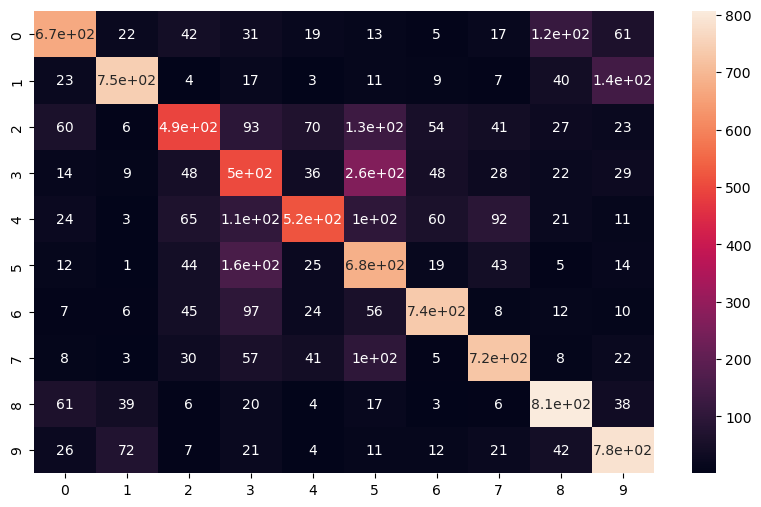

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [37]:
my_image = x_test[0]

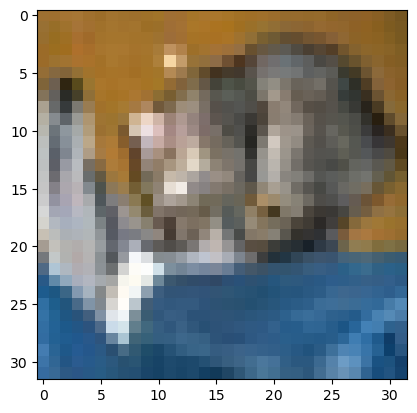

In [38]:
plt.imshow(my_image)

In [39]:
y_test[0]

array([3], dtype=uint8)

In [40]:
result = np.round(model.predict(my_image.reshape(1,32,32,3)))

1/1 [==============================] - 0s 47ms/step


In [41]:
result

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
results= np.where(result != 0)

In [43]:
results[-1]

array([3], dtype=int64)